# 전처리

1. 결측치가 있는 변수를 찾아 변수를 지우는 것 외에 결측치 처리하기

In [252]:
# 필요한 패키지 import

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline 

In [253]:
# 데이터 불러오기

data = pd.read_csv('Auction_master_train.csv')
data.head(5)

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


In [254]:
# 피처 살펴보기

print(data.columns.values)

['Auction_key' 'Auction_class' 'Bid_class' 'Claim_price'
 'Appraisal_company' 'Appraisal_date' 'Auction_count'
 'Auction_miscarriage_count' 'Total_land_gross_area'
 'Total_land_real_area' 'Total_land_auction_area' 'Total_building_area'
 'Total_building_auction_area' 'Total_appraisal_price'
 'Minimum_sales_price' 'First_auction_date' 'Final_auction_date'
 'Final_result' 'Creditor' 'addr_do' 'addr_si' 'addr_dong' 'addr_li'
 'addr_san' 'addr_bunji1' 'addr_bunji2' 'addr_etc' 'Apartment_usage'
 'Preserve_regist_date' 'Total_floor' 'Current_floor' 'Specific'
 'Share_auction_YorN' 'road_name' 'road_bunji1' 'road_bunji2' 'Close_date'
 'Close_result' 'point.y' 'point.x' 'Hammer_price']


In [255]:
print(data.describe())

       Auction_key   Claim_price  Auction_count  Auction_miscarriage_count  \
count  1933.000000  1.933000e+03    1933.000000                1933.000000   
mean   1380.271081  3.703908e+08       1.836006                   0.788412   
std     801.670470  1.337869e+09       0.938319                   0.831715   
min       1.000000  0.000000e+00       1.000000                   0.000000   
25%     691.000000  7.746112e+07       1.000000                   0.000000   
50%    1395.000000  1.728143e+08       2.000000                   1.000000   
75%    2062.000000  3.565089e+08       2.000000                   1.000000   
max    2762.000000  2.286481e+10      13.000000                   9.000000   

       Total_land_gross_area  Total_land_real_area  Total_land_auction_area  \
count           1.933000e+03           1933.000000              1933.000000   
mean            3.458714e+04             42.333802                41.310776   
std             9.442101e+04             65.274404          

In [256]:
print(data.dtypes)

Auction_key                      int64
Auction_class                   object
Bid_class                       object
Claim_price                      int64
Appraisal_company               object
Appraisal_date                  object
Auction_count                    int64
Auction_miscarriage_count        int64
Total_land_gross_area          float64
Total_land_real_area           float64
Total_land_auction_area        float64
Total_building_area            float64
Total_building_auction_area    float64
Total_appraisal_price            int64
Minimum_sales_price              int64
First_auction_date              object
Final_auction_date              object
Final_result                    object
Creditor                        object
addr_do                         object
addr_si                         object
addr_dong                       object
addr_li                         object
addr_san                        object
addr_bunji1                    float64
addr_bunji2              

In [257]:
# null 값 개수 확인
data.isnull().sum()

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

In [258]:
# null 값이 있는 피처만 뽑아서 확인
# 주소(리), 주소 (번지2), 기타 특이사항, 도로명주소 번지 1, 2

data[["addr_li", "addr_bunji2", "Specific", "road_bunji1", "road_bunji2"]]

,addr_li,addr_bunji2,Specific,road_bunji1,road_bunji2
0,NaN,NaN,NaN,30.0,NaN
1,NaN,NaN,NaN,33.0,NaN
2,NaN,NaN,NaN,88.0,NaN
3,NaN,23.0,NaN,110.0,NaN
4,NaN,2.0,NaN,51.0,NaN
5,NaN,93.0,NaN,58.0,NaN
6,NaN,1.0,NaN,61.0,NaN
7,NaN,30.0,NaN,111.0,NaN
8,NaN,1.0,NaN,10.0,NaN
9,NaN,20.0,NaN,96.0,7.0


In [259]:
# 상세주소가 없는 곳도 있고 리까지 들어가지 않는 곳도 있음. 
# 삭제하지 않고 채워넣기에는 결측치 개수가 제일 적은 도로명주소 번지1이 제일 적합
# 그러나 수치형 데이터가 아니라서 평균값을 채울 수 없음. 0번지의 존재 유무를 파악하고 없으면 없는 값이라는 의미로 0으로 대체

data.loc[data["road_bunji1"] == 0]
data["road_bunji1"].fillna(0, inplace=True)

2. 범주형 변수 7개를 찾아 Nominal (명목형) 과 ordinal (순서형)을 구분한 뒤 알맞게 인코딩

In [260]:
# 범주형 변수 (모두 명목형)
# Auction_class, Bid_class, Share_auction_YorN, Close_result, Final_result, Apartment_usage, addr_do

# Auction_key, road_bunji1, road_bunji2, Specific, Appraisal_company, Specific, road_name, Creditor, addr_ 은
# 값이 너무 다양해서 인코딩하면 칼럼이 불필요하게 늘어날 수 있어서 제외

In [261]:
data["Apartment_usage"].unique()

# 확인 결과 
# Auction_class, Bid_class, Share_auction_YorN, Close_result, Final_result, Apartment_usage, addr_do는 그대로 인코딩 가능
# Close_result은 인코딩하기 전에 공백 처리 필요
# Final_result는 값이 하나뿐이고 결측치 없음

array(['주상복합', '아파트'], dtype=object)

In [262]:
# Auction_class : 강제, 임의
# Bid_class : 개별 일괄 일반
# Share_auction_YorN : N, Y
# Close_result: 배당, 배당없음 (아래)
# Final_result: 낙찰
# Apartment_usage: 주상복합, 아파트
# addr_do: 부산, 서울

data = pd.concat([data.drop(["Auction_class"], axis=1), pd.get_dummies(data["Auction_class"])], axis=1)
data = pd.concat([data.drop(["Bid_class"], axis=1), pd.get_dummies(data["Bid_class"])], axis=1)
data = pd.concat([data.drop(["Share_auction_YorN"], axis=1), pd.get_dummies(data["Share_auction_YorN"])], axis=1)
data = pd.concat([data.drop(["Final_result"], axis=1), pd.get_dummies(data["Final_result"])], axis=1)
data = pd.concat([data.drop(["Apartment_usage"], axis=1), pd.get_dummies(data["Apartment_usage"])], axis=1)
data = pd.concat([data.drop(["addr_do"], axis=1), pd.get_dummies(data["addr_do"])], axis=1)

In [263]:
# Close_result 공백 처리
# 여기서 , 'Close_result' 부분을 빼먹으면 공백이 있는 행 전체를 '배당없음'으로 처리하니 유의

data.loc[data["Close_result"]=='    ', 'Close_result'] = "배당없음"

In [264]:
data = pd.concat([data.drop(["Close_result"], axis=1), pd.get_dummies(data["Close_result"])], axis=1)

# EDA

3. 연속형 변수들 간 상관관계를 나타내는 correlation matrix 를 만드신뒤, heat map 으로 시각해보세요

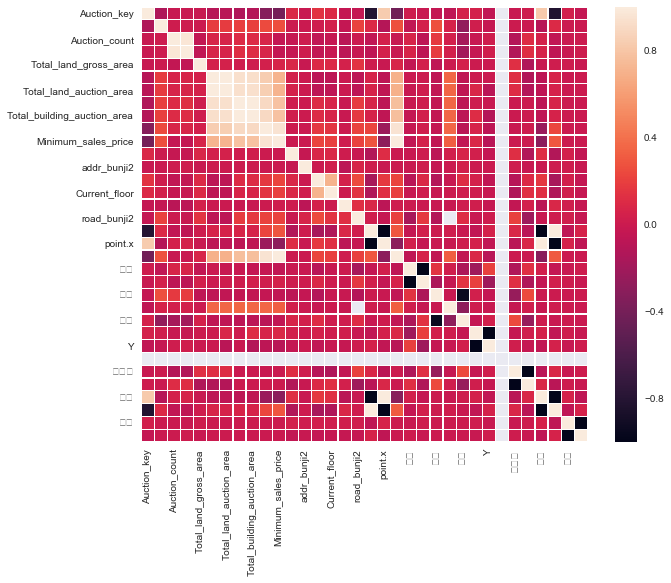

In [265]:
sns.heatmap(data.corr(),linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

4. 연속형 변수 5 가지를 선정해 타겟 변수와 관계를 나타내는 그래프로 시각화 해주세요. (타겟 변수는 Hammer Price 입니다)

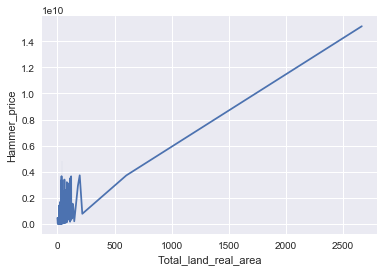

In [266]:
sns.lineplot(x="Total_land_real_area", y="Hammer_price",
             data=data[["Total_land_real_area", "Hammer_price"]])

# 실면적이 넓을수록 낙찰가가 높다

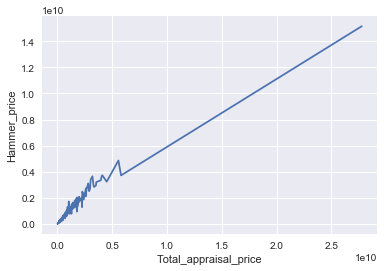

In [267]:
sns.lineplot(x="Total_appraisal_price", y="Hammer_price",
             data=data[["Total_appraisal_price", "Hammer_price"]])

# 총감정가와 낙찰가는 비례한다

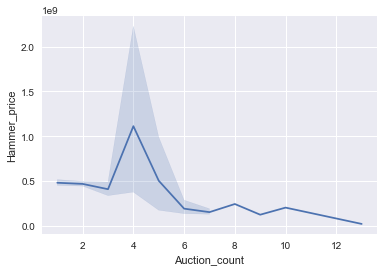

In [268]:
sns.lineplot(x="Auction_count", y="Hammer_price",
             data=data[["Auction_count", "Hammer_price"]])

# 총경매횟수가 늘수록 낙찰가가 낮다. 4회에 가장 많이 분포하고 있다.

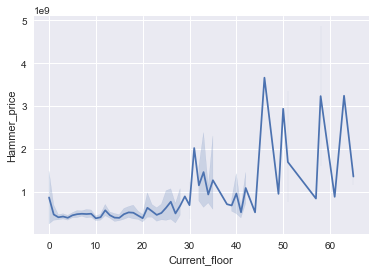

In [269]:
sns.lineplot(x="Current_floor", y="Hammer_price",
             data=data[["Current_floor", "Hammer_price"]])

# 현재층과 낙찰가 사이에 확실히 드러나는 연관은 없다. 
# 그러나 현재층이 높으면 낙찰가가 높은 경우가 있고, 현재층이 45층 이상이면 변동폭이 크다.
# 현재층수가 30층 아래면 낙찰가 수준이 1을 넘는 경우가 없다.

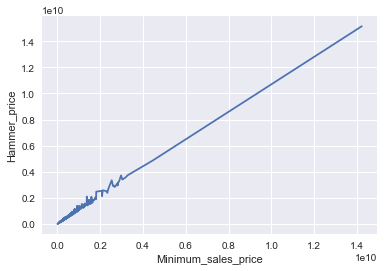

In [270]:
sns.lineplot(x="Minimum_sales_price", y="Hammer_price",
             data=data[["Minimum_sales_price", "Hammer_price"]])

# 최저매각가격과 낙찰가는 비례한다. 사실 당연한 결과..

5. 3차원 정보 (변수 3 가지) 를 담고있는 도표 3개


> 3차원 그래프 https://frhyme.github.io/python-lib/matplotlib_3dplotting/ 과 https://jovianlin.io/data-visualization-seaborn-part-3/

> 그 외 https://frhyme.github.io/python-lib/matplotlib_extracting_color_from_cmap/

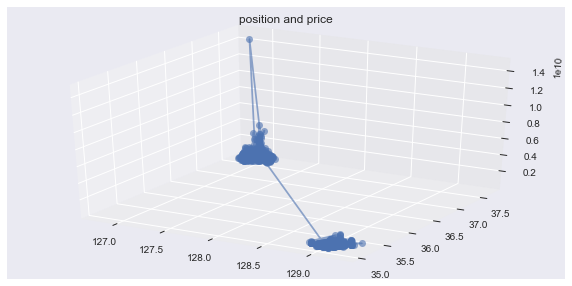

In [271]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
x = data["point.x"]
y = data["point.y"]
z = data["Hammer_price"]
ax.plot(x, y, z, alpha=0.6, marker='o')
plt.title("position and price")
plt.show()

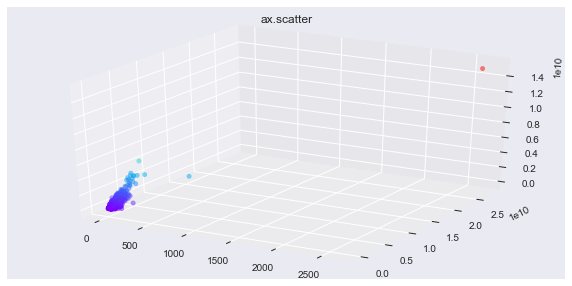

In [272]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 500
x = data["Total_land_real_area"]
y = data["Total_appraisal_price"]
z = data["Hammer_price"]
ax.scatter(x, y, z, c = z, s= 20, alpha=0.5, cmap=plt.cm.rainbow)
plt.title("ax.scatter")
plt.show()

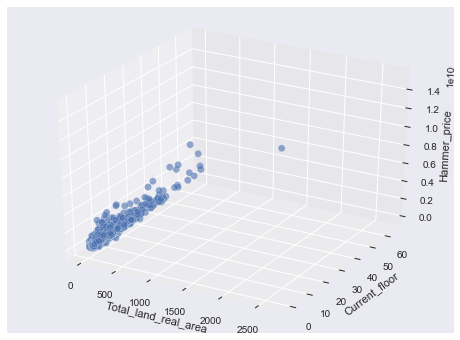

In [273]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = data["Total_land_real_area"]
y = data["Current_floor"]
z = data["Hammer_price"]
ax.scatter(x, y, z, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Total_land_real_area')
ax.set_ylabel('Current_floor')
ax.set_zlabel('Hammer_price')

plt.show()

In [274]:
# 3차원 공간 그래프 그리기
# - 이상치 때문에 그래프 모양을 제대로 확인할 수 없음
# - 이상치를 확인한 후 제거한 것으로 다시 확인

data.loc[data["Total_land_real_area"]>1000]
data_without_outlier = data.drop(1521,)

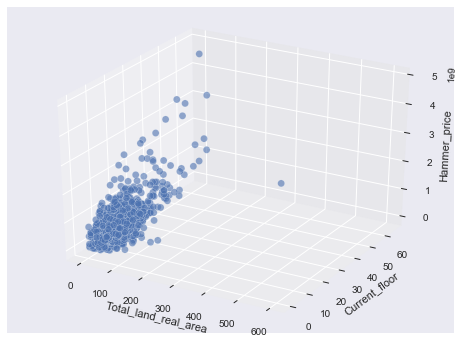

In [275]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = data_without_outlier["Total_land_real_area"]
y = data_without_outlier["Current_floor"]
z = data_without_outlier["Hammer_price"]
ax.scatter(x, y, z, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Total_land_real_area')
ax.set_ylabel('Current_floor')
ax.set_zlabel('Hammer_price')

plt.show()

In [276]:
data.loc[data["Total_land_real_area"]>200]

# 추가 조정
# data_without_outlier = data_without_outlier.drop(1212,) 등

,Auction_key,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,...,일반,N,Y,낙찰,아파트,주상복합,부산,서울,배당,배당없음
1212,1437,600000000,영현감정,2016-07-12 00:00:00,5,3,0.0,603.20,603.20,1203.76,...,0,1,0,1,1,0,0,1,1,0
1521,10,8955865567,대신감정,2015-05-21 00:00:00,4,3,0.0,2665.84,2665.84,4255.07,...,0,1,0,1,1,0,0,1,1,0
1546,744,370245291,삼정감정,2015-11-13 00:00:00,4,3,0.0,218.00,218.00,280.86,...,0,1,0,1,1,0,0,1,1,0


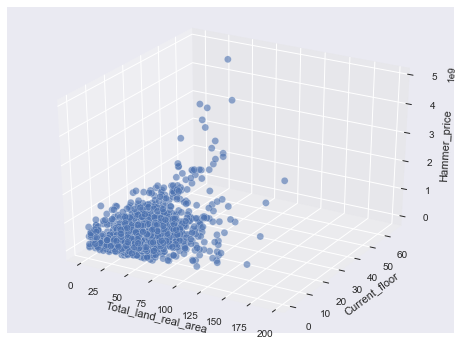

In [279]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = data_without_outlier["Total_land_real_area"]
y = data_without_outlier["Current_floor"]
z = data_without_outlier["Hammer_price"]
ax.scatter(x, y, z, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Total_land_real_area')
ax.set_ylabel('Current_floor')
ax.set_zlabel('Hammer_price')

plt.show()

3차원 정보 담은 그래프 그리기

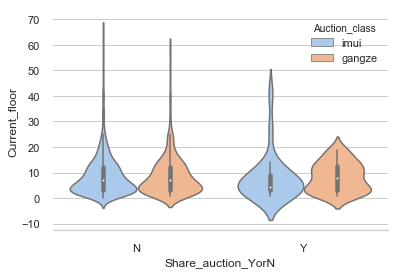

In [281]:
# 바이올린 플랏

# Auction_class : 강제, 임의
# Bid_class : 개별 일괄 일반
# Share_auction_YorN : N, Y
# Close_result: 배당, 배당없음 (아래)
# Final_result: 낙찰
# Apartment_usage: 주상복합, 아파트
# addr_do: 부산, 서울

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
raw_data = pd.read_csv('Auction_master_train.csv')
raw_data.replace(['강제', '임의'], ['gangze', 'imui'], inplace=True) #유니코드로 깨지는 것 막기
raw_data.replace(['주상복합', '아파트'], ['zusang', 'apt'], inplace=True)

# Draw a nested violinplot and split the violins for easier comparison 
# 바이올린 플랏 유의: 타깃은 0 or 1이어야 함, y축에 수치형 데이터를 넣으면 너무 많이 만들어지니까 범주형 추천

sns.violinplot(x="Share_auction_YorN", y="Current_floor", hue="Auction_class",
               data=raw_data)
sns.despine(left=True)
# 자분경매을 하지 않은 경우는 임의와 강제 모두 분포가 일정한 편이고, 
# 자분경매를 한 경우는 임의경매로 넘어간 쪽 범위가 넓지만 둘 다 저층에 다수 분포되어 있다. 

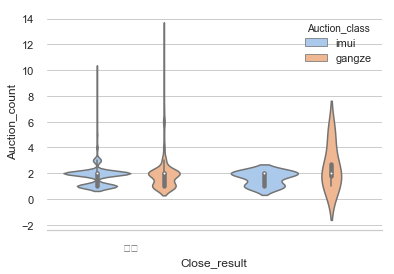

In [282]:
sns.violinplot(x="Close_result", y="Auction_count", hue="Auction_class",
               data=raw_data)
sns.despine(left=True)

# 배당된 쪽에 이상치가 많은 편. 임의경매에 들어간 배당된 부동산은 경매에 부쳐진 횟수 2번이 제일 많았다.
# 미배당된 경우 강제 경매로 넘어가면 최다 8회까지 경매에 부쳐졌다. 임의 경매일 경우 4회를 넘지 않았다.
# 참고: 미배당은 공백

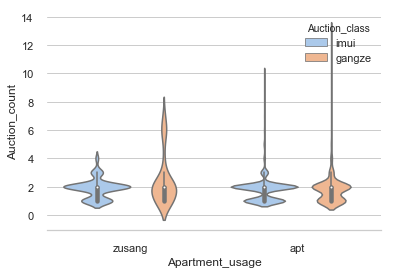

In [283]:
sns.violinplot(x="Apartment_usage", y="Auction_count", hue="Auction_class",
               data=raw_data)
sns.despine(left=True)

# 주상복합은 임의경매에서는 경매에 2회 부쳐진 경우가 많았고, 강제 경매도 마찬가지였지만, 8회까지 가는 경우가 있었다.
# 아파트는 강제경매든 임의경매든 1~2회에 부쳐진 경우가 많았다.